In [1]:
import os
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = 'PowerCons'
model = 'ResidualCNN'

datasets = ['PowerCons', 'Strawberry']
models = ['S4', 'ResidualCNN', 'TST', 'PatchTST', 'RNNA']
prefix = 'fast_run'

flag_test = True

# path = f'results/{dataset}/{model}/attack/fgsm_attack_fast_run/model_ResidualCNN_100_PowerCons_attack_fgsm_attack__eps=0.01__n_steps=50.csv'


results = pd.DataFrame()

for dataset in datasets:
    df_dataset = pd.DataFrame()
    for model in models:
        model_data = pd.DataFrame()
        path = f'../results/{dataset}/{model}/attack'

        try:
            experiments = [exp for exp in os.listdir(path) if prefix in exp if prefix in exp]
            
            for exp_folder in experiments:
                exp_path = os.path.join(path, exp_folder)
                #print(exp_folder)
                exp_params = [exp for exp in os.listdir(exp_path) if '.csv' in exp]
                
                exp_data = pd.DataFrame()
                for param_file in exp_params:
                    metric_path = os.path.join(exp_path, param_file)
                    #print(metric_path)
                    param_df = pd.read_csv(metric_path)
                    param_df.columns = [col.strip() for col in param_df.columns]
                    
                    exp_data = pd.concat([exp_data, param_df], axis=0)
                
                exp_name = exp_folder
                exp_name.replace(prefix, '')
                exp_data['experiment'] = exp_name
                exp_data['model'] = model
                exp_data['dataset'] = dataset

                if len(exp_data.columns) > 22 or flag_test:
                    flag_test = False
                model_data = pd.concat([model_data, exp_data], axis=0)
        except:
            print(path)
        
        #print(len(model_data.columns))
        df_dataset = pd.concat([df_dataset, model_data], axis=0)


    results = pd.concat([results, df_dataset], axis=0)



In [3]:
len(results.columns)

27

In [4]:
results['experiment'].unique(), results['model'].unique(), results['dataset'].unique()

(array(['fgsm_disc_attack_fast_run', 'fgsm_attack_fast_run'], dtype=object),
 array(['S4', 'ResidualCNN', 'TST', 'PatchTST', 'RNNA'], dtype=object),
 array(['PowerCons', 'Strawberry'], dtype=object))

In [5]:
agg_data = results.groupby(by=['dataset', 'model', 'experiment'], as_index=False).agg({'F_EFF_CONC': max})
agg_data = agg_data.pivot(index=['dataset', 'model'], columns='experiment', values='F_EFF_CONC').reset_index()
agg_data

experiment,dataset,model,fgsm_attack_fast_run,fgsm_disc_attack_fast_run
0,PowerCons,PatchTST,0.1978,0.4442
1,PowerCons,RNNA,0.1017,0.8407
2,PowerCons,ResidualCNN,0.2792,0.7517
3,PowerCons,S4,0.1742,0.5126
4,PowerCons,TST,0.0567,0.4865
5,Strawberry,PatchTST,0.4143,0.9455
6,Strawberry,RNNA,0.3845,0.7327
7,Strawberry,ResidualCNN,0.2470,0.6216
8,Strawberry,S4,0.3074,0.3568
9,Strawberry,TST,0.4206,0.8439


(0.0, 1.0)

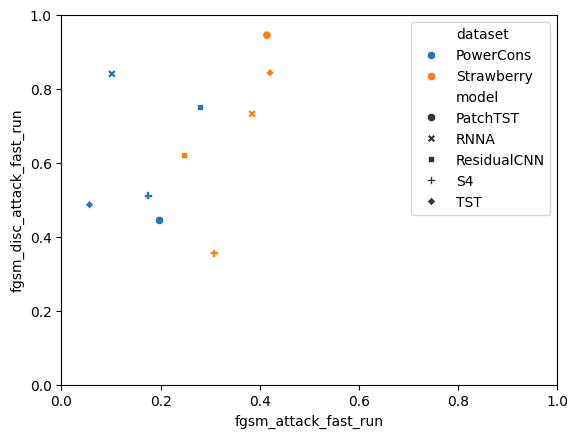

In [ ]:
sns.scatterplot(data=agg_data, x='fgsm_attack_fast_run', y='fgsm_disc_attack_fast_run', style='model', hue='dataset')
plt.xlim([0, 1])
plt.ylim([0, 1])

/tmp/ipykernel_138792/1907485424.py:12: UserWarning: 
The markers list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


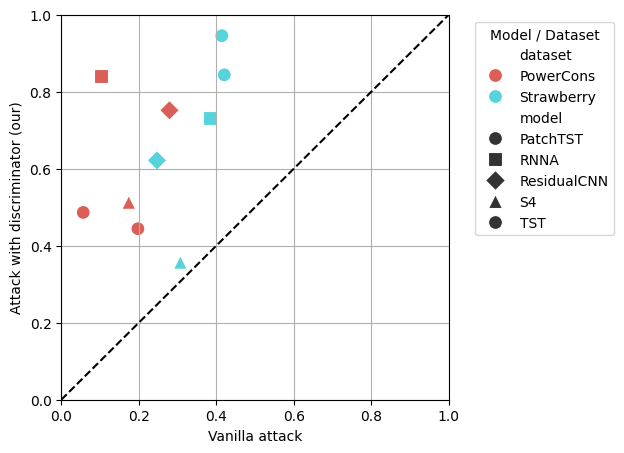

In [13]:
df = agg_data

# Цветовая палитра для датасетов
palette = sns.color_palette("hls", 2)

# Формы точек для моделей
markers = ['o', 's', 'D', '^']

plt.figure(figsize=[5, 5])

# Создание scatterplot
sns.scatterplot(
    x='fgsm_attack_fast_run', 
    y='fgsm_disc_attack_fast_run', 
    hue='dataset', 
    style='model',
    data=df,
    palette=palette,
    markers=markers,
    s=100
)

# Настройка графика
plt.xlabel('Vanilla attack')
plt.ylabel('Attack with discriminator (our)')
plt.xlim(0, 1)
plt.ylim(0, 1)

# Диагональная линия
plt.plot([0, 1], [0, 1], 'k--')

# Легенда
plt.legend(title='Model / Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
# plt.title('Изменение метрики атаки с дискриминатором и без дискриминатора')
# # Отображение графика
# plt.tight_layout()
plt.show()